In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/maa/Desktop/PYTHON/My_Projects/Sales_Forecasting/data/Internship Superstore data.csv',encoding='latin1')
print(df.shape)

(9994, 21)


In [3]:
print(df.head(5))

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11-08-16    11-11-16    Second Class    CG-12520   
1       2  CA-2016-152156   11-08-16    11-11-16    Second Class    CG-12520   
2       3  CA-2016-138688   06-12-16   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966   10-11-15  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966   10-11-15  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR

In [4]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Ship Date']=pd.to_datetime(df['Ship Date'],errors='coerce')
print(df.isnull().sum())
print(df.head(7))
df=df.drop('Row ID',axis=1)
df=df.drop_duplicates()
print(df.head(7))

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
5       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
6       7  CA-2014-115812 2014-06-0

In [5]:
df_prophet=df.groupby('Order Date')['Sales'].sum().reset_index()
df_prophet=df_prophet.rename(columns={'Order Date':'ds','Sales':'y'})
print(df_prophet.head(7))

          ds         y
0 2014-01-03    16.448
1 2014-01-04   288.060
2 2014-01-05    19.536
3 2014-01-06  4407.100
4 2014-01-07    87.158
5 2014-01-09    40.544
6 2014-01-10    54.830


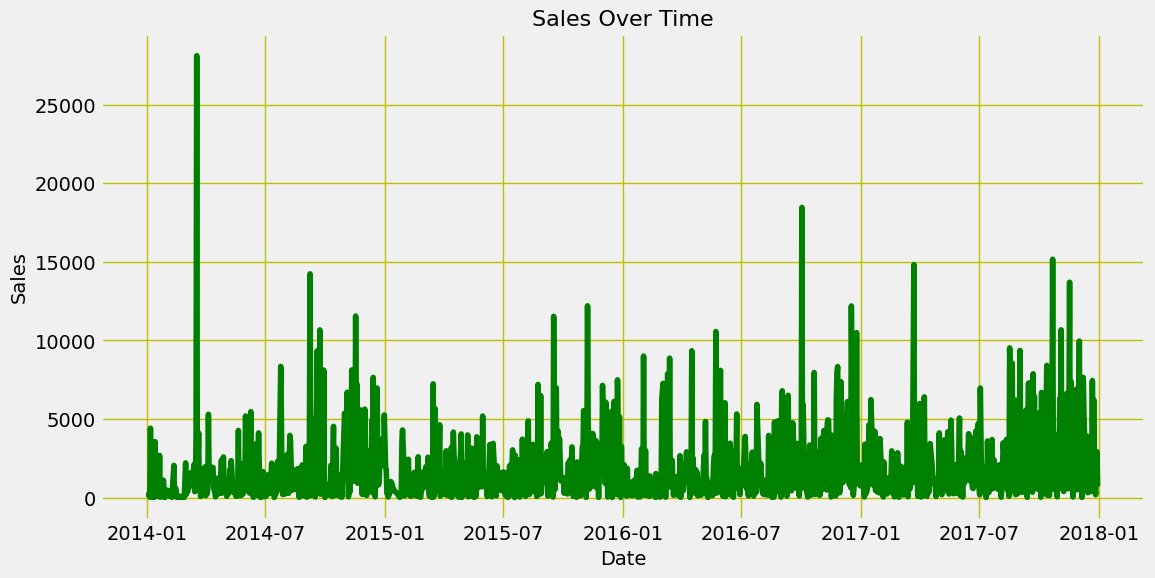

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
sns.lineplot(x='ds',y='y',data=df_prophet,color='green')
plt.title('Sales Over Time',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='y')
plt.show()

In [7]:
df_prophet['Year_Month']=df_prophet['ds'].dt.to_period('M').astype(str)
monthlysales=df_prophet.groupby('Year_Month')['y'].sum().reset_index()
print(monthlysales.head(7))

  Year_Month           y
0    2014-01  14236.8950
1    2014-02   4519.8920
2    2014-03  55691.0090
3    2014-04  28013.9730
4    2014-05  23648.2870
5    2014-06  34595.1276
6    2014-07  33946.3930


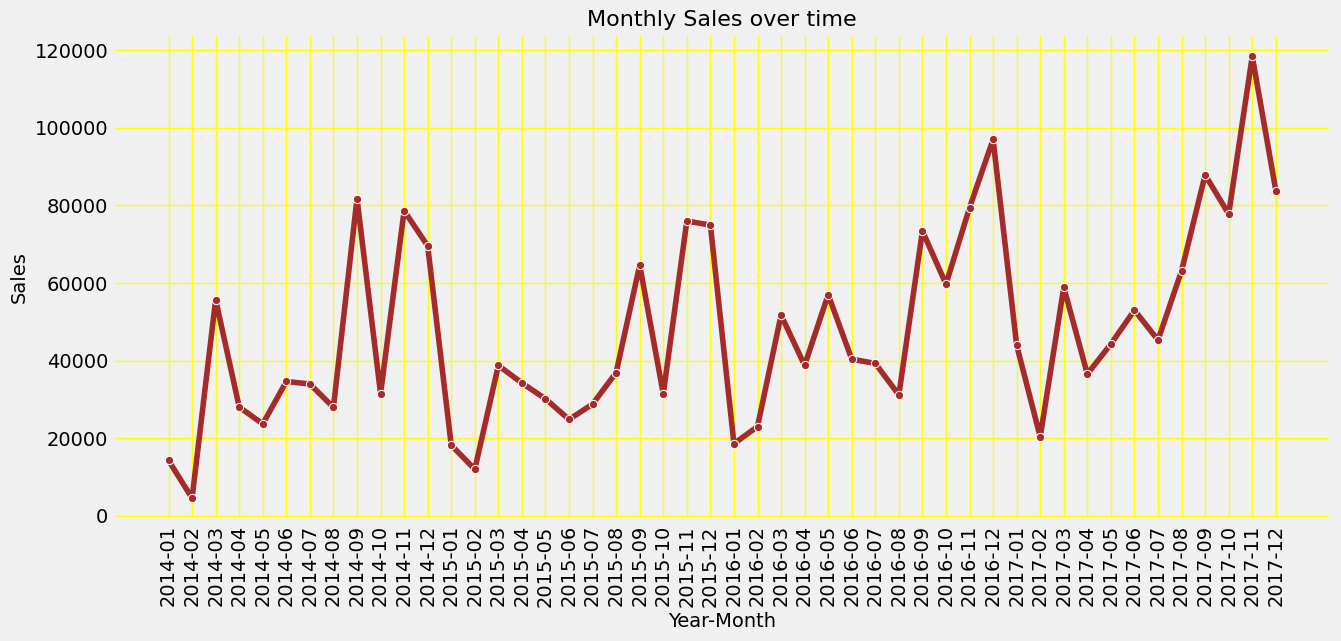

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,6))
sns.lineplot(x='Year_Month',y='y',data=monthlysales,color='brown',marker='o')
plt.title('Monthly Sales over time',fontsize=16)
plt.xlabel('Year-Month',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xticks(rotation=90)
plt.grid(color='yellow')
plt.show()

In [9]:
df_prophet['Month']=df_prophet['ds'].dt.month
monthly_sales=df_prophet.groupby('Month')['y'].sum().reset_index()
monthly_sales['Month']=monthly_sales['Month'].astype(str)
print(monthly_sales.head(12))

   Month            y
0      1   94924.8356
1      2   59751.2514
2      3  205005.4888
3      4  137480.7566
4      5  155028.8117
5      6  152718.6793
6      7  147238.0970
7      8  159044.0630
8      9  307649.9457
9     10  200322.9847
10    11  352461.0710
11    12  325293.5035


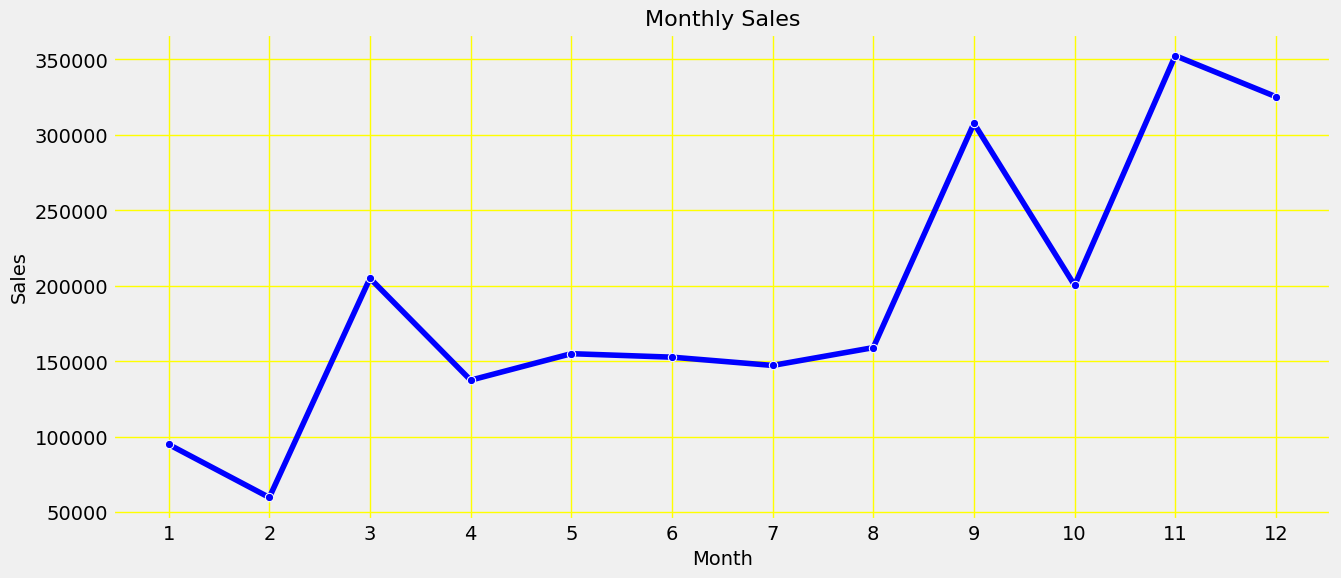

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,6))
sns.lineplot(x='Month',y='y',data=monthly_sales,color='blue',marker='o')
plt.title('Monthly Sales',fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='yellow')
plt.show()

In [11]:
df_prophet['Year']=df_prophet['ds'].dt.year
annual_sales=df_prophet.groupby('Year')['y'].sum().reset_index()
annual_sales['Year']=annual_sales['Year'].astype(str)
print(annual_sales.head())

   Year            y
0  2014  483966.1261
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


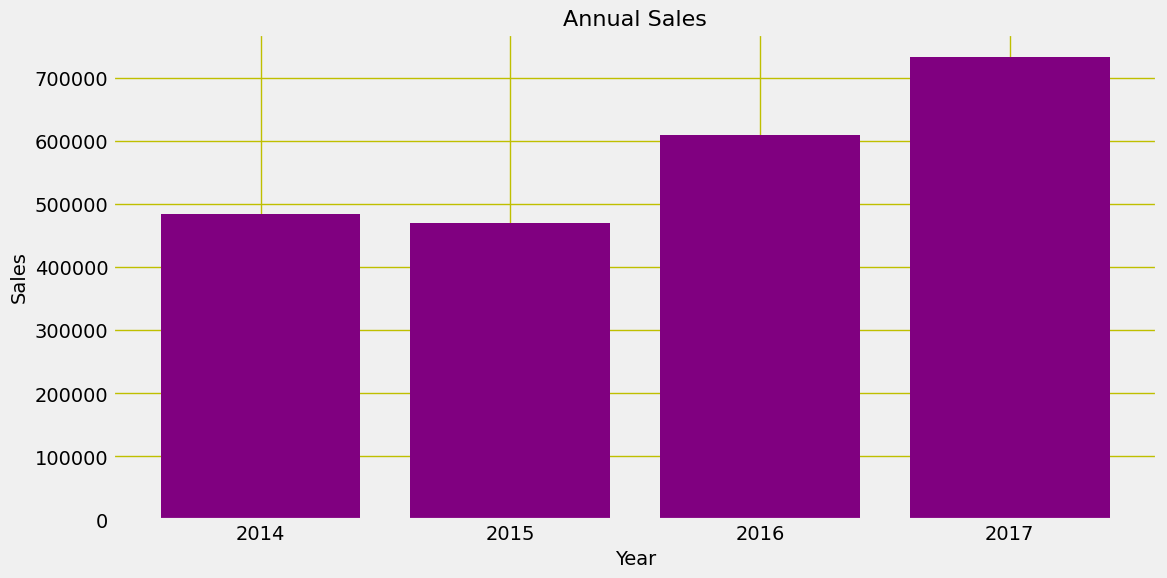

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.bar(annual_sales['Year'],annual_sales['y'],color='purple')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.title('Annual Sales',fontsize=16)
plt.grid(color='y')
plt.show()

In [13]:
df_prophet['Quarter']=df_prophet['ds'].dt.quarter.astype(str)
quarterly_sales=df_prophet.groupby('Quarter')['y'].sum().reset_index()
print(quarterly_sales.head())

  Quarter            y
0       1  359681.5758
1       2  445228.2476
2       3  613932.1057
3       4  878077.5592


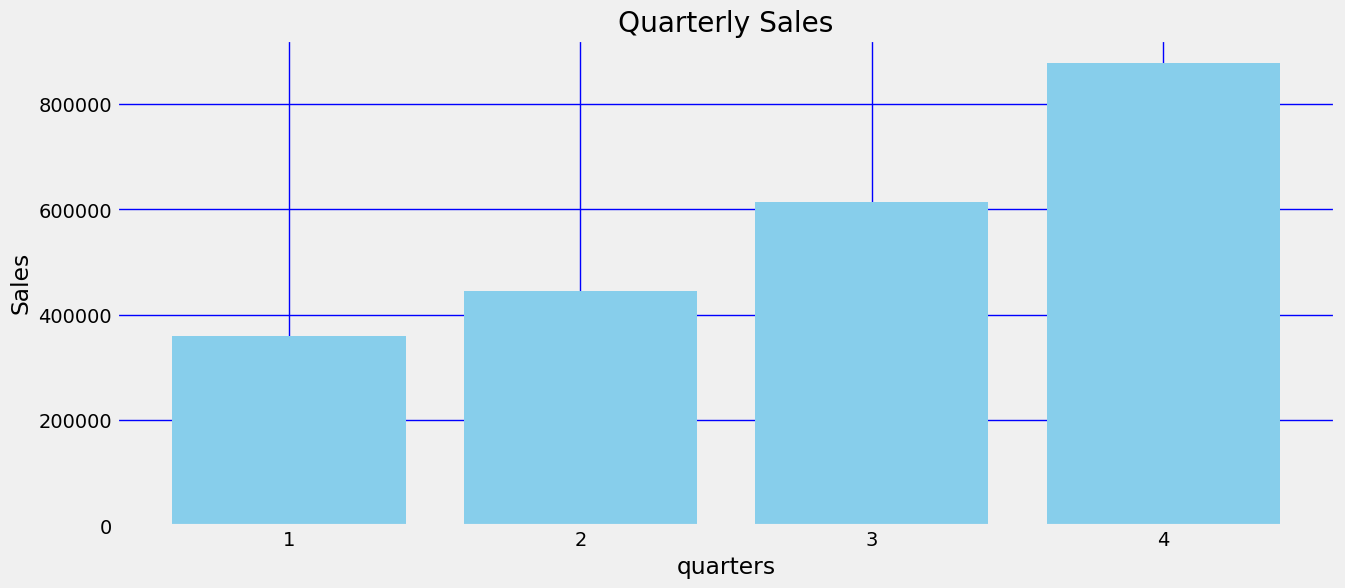

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,6))
plt.bar(quarterly_sales['Quarter'],quarterly_sales['y'],color='skyblue')
plt.title('Quarterly Sales')
plt.xlabel('quarters')
plt.ylabel('Sales')
plt.grid(color='blue')
plt.show()

In [15]:
df_prophet['lag_1']=df_prophet['y'].shift(1)
df_prophet['lag_7']=df_prophet['y'].shift(7)
df_prophet['lag_30']=df_prophet['y'].shift(30)

In [16]:
print(df_prophet.columns)

Index(['ds', 'y', 'Year_Month', 'Month', 'Year', 'Quarter', 'lag_1', 'lag_7',
       'lag_30'],
      dtype='object')


In [17]:
df_prophet['Rolling_7']=df_prophet['y'].rolling(window=7).mean()
df_prophet['Rolling_30']=df_prophet['y'].rolling(window=30).mean()
print(df_prophet.head(35))

           ds         y Year_Month  Month  Year Quarter     lag_1     lag_7  \
0  2014-01-03    16.448    2014-01      1  2014       1       NaN       NaN   
1  2014-01-04   288.060    2014-01      1  2014       1    16.448       NaN   
2  2014-01-05    19.536    2014-01      1  2014       1   288.060       NaN   
3  2014-01-06  4407.100    2014-01      1  2014       1    19.536       NaN   
4  2014-01-07    87.158    2014-01      1  2014       1  4407.100       NaN   
5  2014-01-09    40.544    2014-01      1  2014       1    87.158       NaN   
6  2014-01-10    54.830    2014-01      1  2014       1    40.544       NaN   
7  2014-01-11     9.940    2014-01      1  2014       1    54.830    16.448   
8  2014-01-13  3553.795    2014-01      1  2014       1     9.940   288.060   
9  2014-01-14    61.960    2014-01      1  2014       1  3553.795    19.536   
10 2014-01-15   149.950    2014-01      1  2014       1    61.960  4407.100   
11 2014-01-16   299.964    2014-01      1  2014     

In [18]:
df_prophet['Day_of_Week']=df_prophet['ds'].dt.dayofweek.astype(str)
dayofweek_sales=df_prophet.groupby('Day_of_Week')['y'].sum().reset_index()
dayofweek_sales['Day_of_Week']=dayofweek_sales['Day_of_Week'].map({
    '0':'Monday',
    '1':'Tuesday',
    '2':'Wednesday',
    '3':'Thursday',
    '4':'Friday',
    '5':'Saturday',
    '6':'Sunday'})

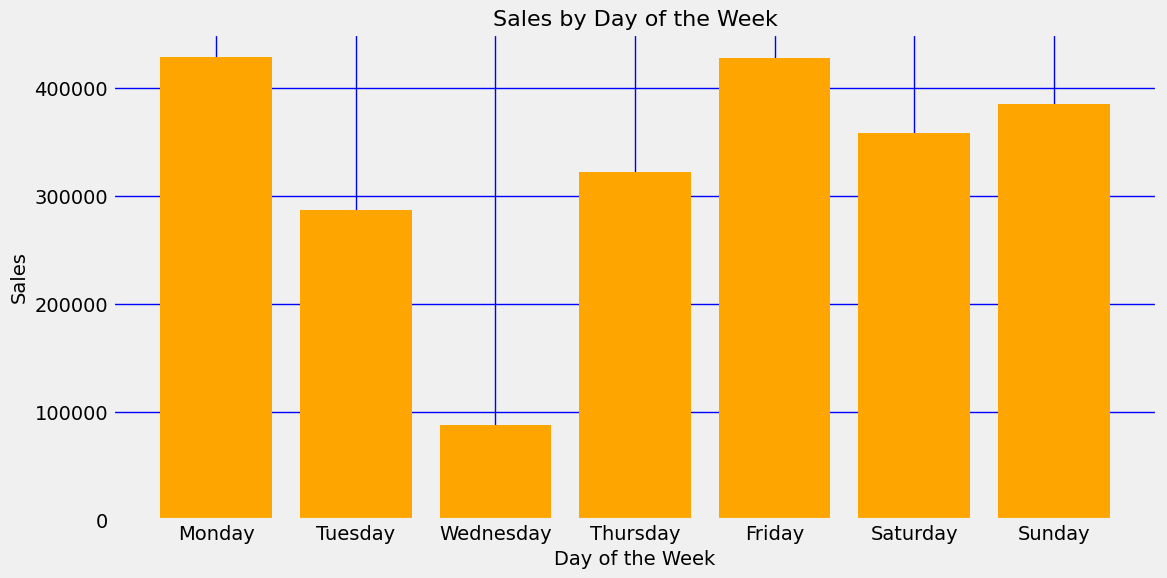

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.bar(dayofweek_sales['Day_of_Week'],dayofweek_sales['y'],color='orange')
plt.title('Sales by Day of the Week',fontsize=16)
plt.xlabel('Day of the Week',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='b')
plt.show()

In [20]:
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
holidays_df=make_holidays_df(year_list=[2014,2015,2016,2017],country='US')
holidays_df['lower_window']=-3
holidays_df['upper_window']=3
print(holidays_df.head())
print('\nHolidays included:')
print(holidays_df['holiday'].unique())

          ds           holiday  lower_window  upper_window
0 2016-01-01    New Year's Day            -3             3
1 2016-05-30      Memorial Day            -3             3
2 2016-07-04  Independence Day            -3             3
3 2016-09-05         Labor Day            -3             3
4 2016-11-11      Veterans Day            -3             3

Holidays included:
["New Year's Day" 'Memorial Day' 'Independence Day' 'Labor Day'
 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'Christmas Day (observed)' 'Martin Luther King Jr. Day'
 "Washington's Birthday" 'Columbus Day' "New Year's Day (observed)"
 'Veterans Day (observed)' 'Independence Day (observed)']


In [21]:
df_holiday=df_prophet.merge(holidays_df[['ds','holiday']],on='ds',how='left')
df_holiday['isholiday']=df_holiday['holiday'].notna().astype(int)
print(df_holiday.tail(10))

             ds          y Year_Month  Month  Year Quarter      lag_1  \
1227 2017-12-21  2140.9400    2017-12     12  2017       4   377.7360   
1228 2017-12-22  7442.0210    2017-12     12  2017       4  2140.9400   
1229 2017-12-23  1926.7760    2017-12     12  2017       4  7442.0210   
1230 2017-12-24  6233.0540    2017-12     12  2017       4  1926.7760   
1231 2017-12-25  2698.9270    2017-12     12  2017       4  6233.0540   
1232 2017-12-26   814.5940    2017-12     12  2017       4  2698.9270   
1233 2017-12-27   177.6360    2017-12     12  2017       4   814.5940   
1234 2017-12-28  1657.3508    2017-12     12  2017       4   177.6360   
1235 2017-12-29  2915.5340    2017-12     12  2017       4  1657.3508   
1236 2017-12-30   713.7900    2017-12     12  2017       4  2915.5340   

         lag_7    lag_30    Rolling_7   Rolling_30 Day_of_Week        holiday  \
1227  3897.714  2988.274  1607.694429  3067.232633           3            NaN   
1228   306.888  2236.184  2626.999

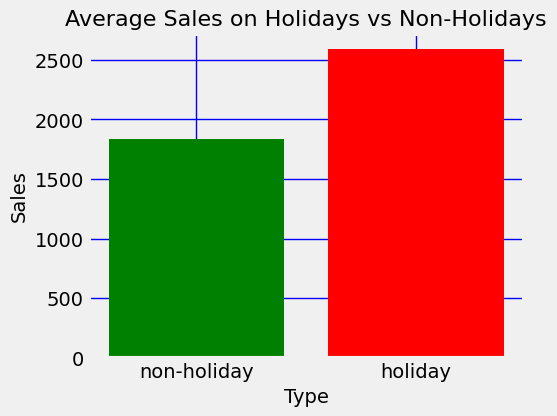

In [22]:
holiday_sales=df_holiday.groupby('isholiday')['y'].mean().reset_index()
holiday_sales['type']=holiday_sales['isholiday'].map({0:'non-holiday',1:'holiday'})
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5,4))
plt.bar(holiday_sales['type'],holiday_sales['y'],color=['green','red'])
plt.title('Average Sales on Holidays vs Non-Holidays',fontsize=16)
plt.xlabel('Type',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='b')
plt.show()

In [23]:
category_map=df[['Order Date','Category','Region']].copy()
category_map=category_map.rename(columns={'Order Date':'ds'})
print(category_map.head(7))

          ds         Category Region
0 2016-11-08        Furniture  South
1 2016-11-08        Furniture  South
2 2016-06-12  Office Supplies   West
3 2015-10-11        Furniture  South
4 2015-10-11  Office Supplies  South
5 2014-06-09        Furniture   West
6 2014-06-09  Office Supplies   West


In [24]:
df_holiday=df_holiday.merge(category_map,on='ds',how='left')
print(df_holiday.columns)

Index(['ds', 'y', 'Year_Month', 'Month', 'Year', 'Quarter', 'lag_1', 'lag_7',
       'lag_30', 'Rolling_7', 'Rolling_30', 'Day_of_Week', 'holiday',
       'isholiday', 'Category', 'Region'],
      dtype='object')


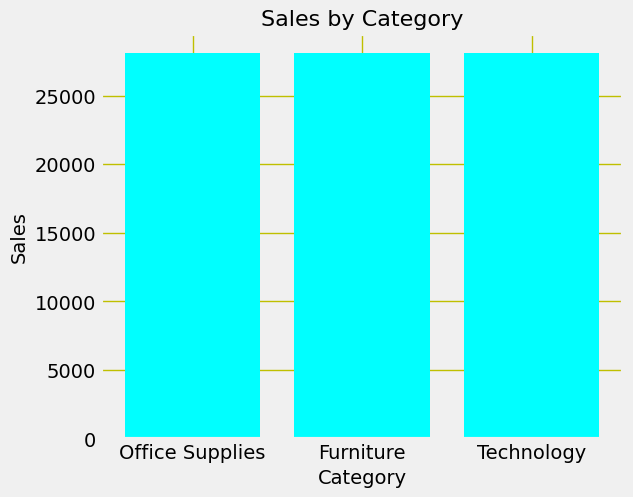

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,5))
plt.bar(df_holiday['Category'],df_holiday['y'],color='cyan')
plt.title('Sales by Category',fontsize=16)
plt.xlabel('Category',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='y')
plt.show()

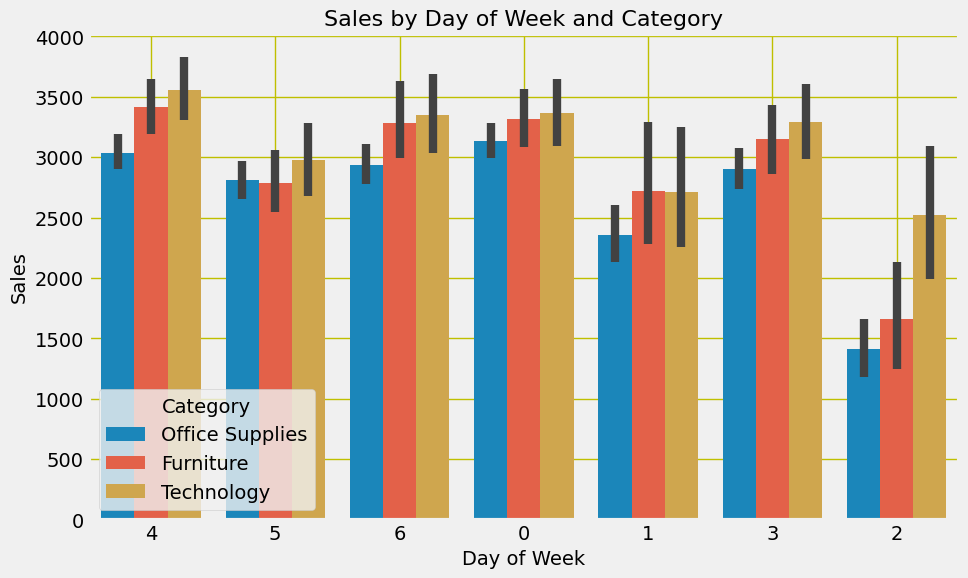

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Day_of_Week',y='y',hue='Category',data=df_holiday)
plt.title('Sales by Day of Week and Category',fontsize=16)
plt.xlabel('Day of Week',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='y')
plt.show()

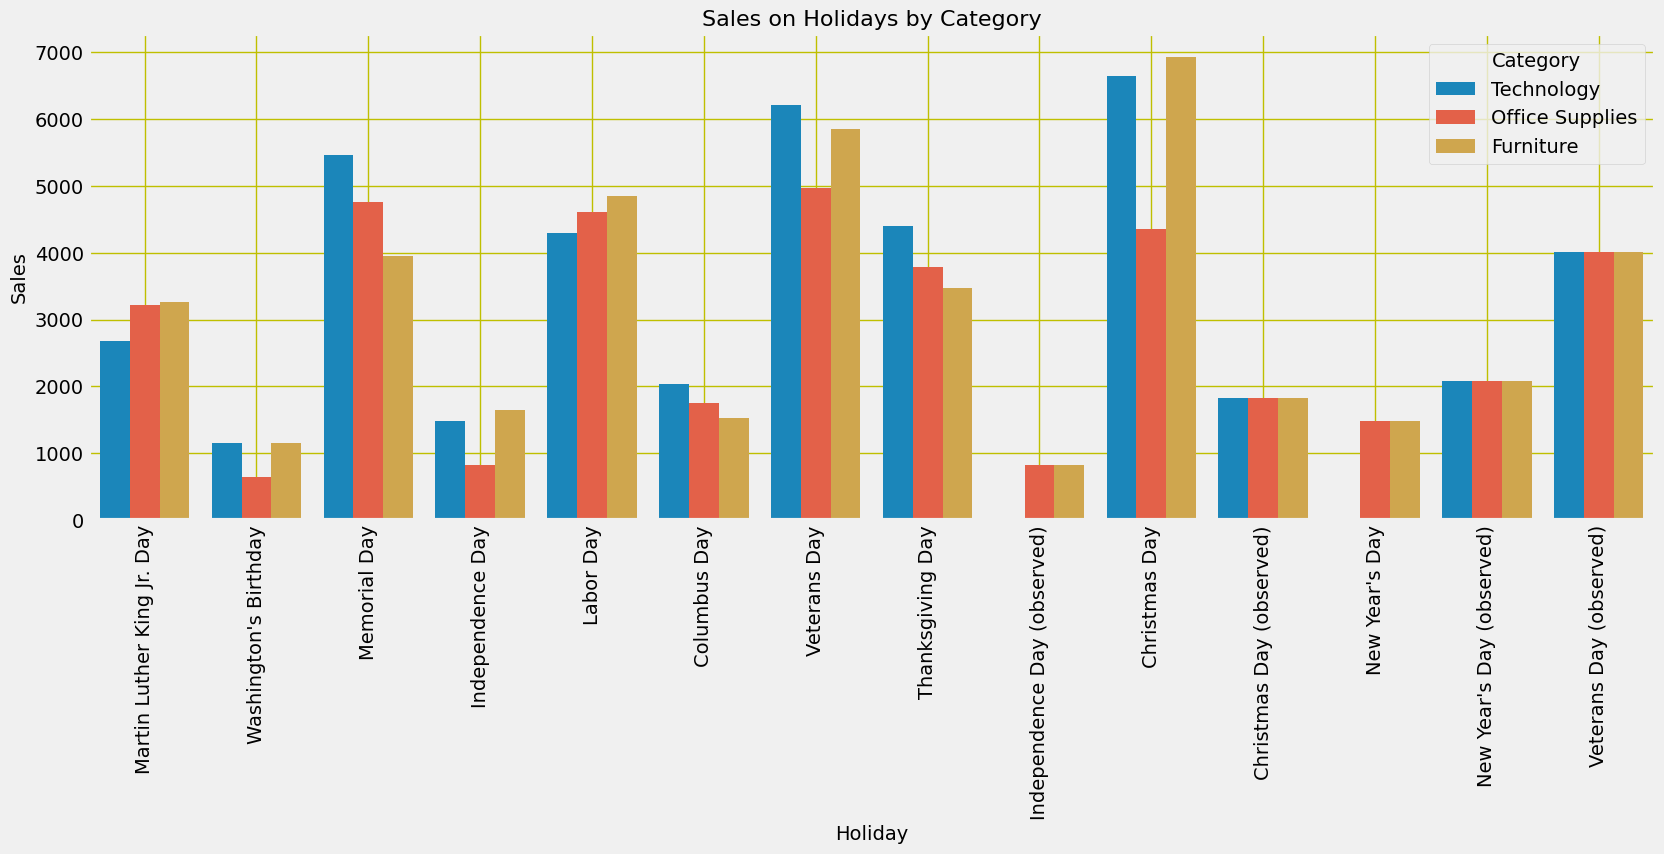

In [27]:
plt.figure(figsize=(18,6))
sns.barplot(x='holiday',y='y',hue='Category',data=df_holiday[df_holiday['isholiday']==1],ci=None)
plt.title('Sales on Holidays by Category',fontsize=16)
plt.xlabel('Holiday',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xticks(rotation=90)
plt.grid(color='y')
plt.show()

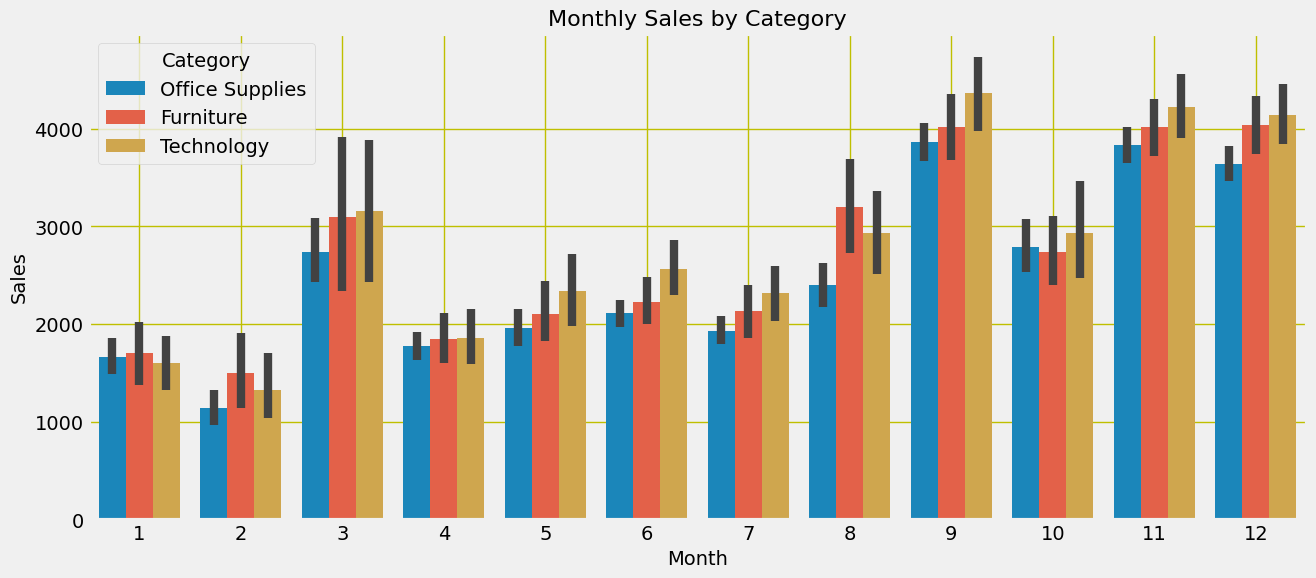

In [28]:
plt.figure(figsize=(14,6))
sns.barplot(x='Month',y='y',hue='Category',data=df_holiday)
plt.title('Monthly Sales by Category',fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='y')
plt.show()

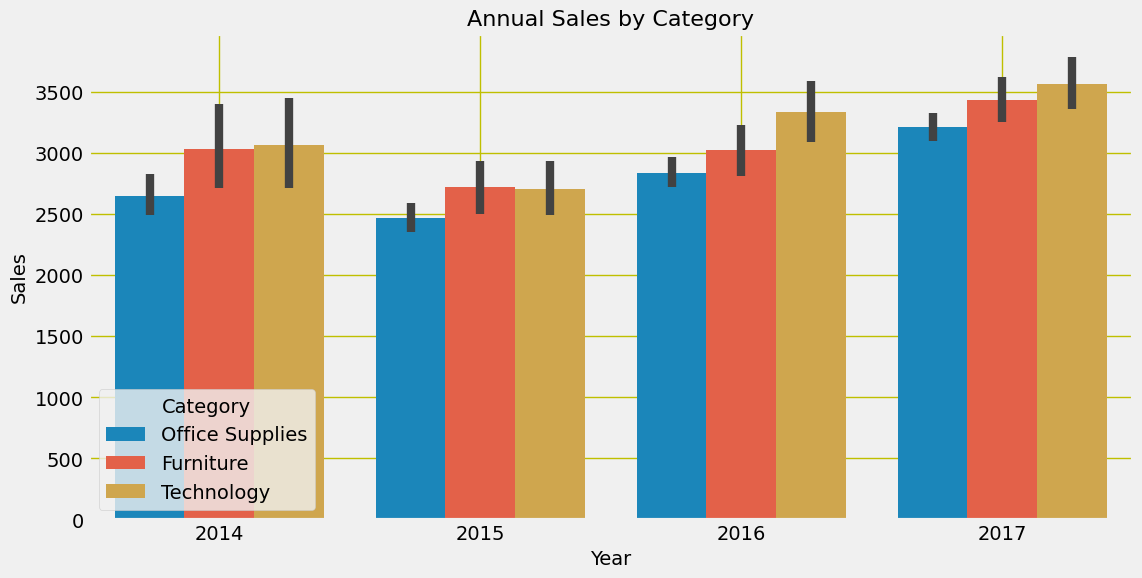

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year',y='y',hue='Category',data=df_holiday)
plt.title('Annual Sales by Category',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='y')
plt.show()

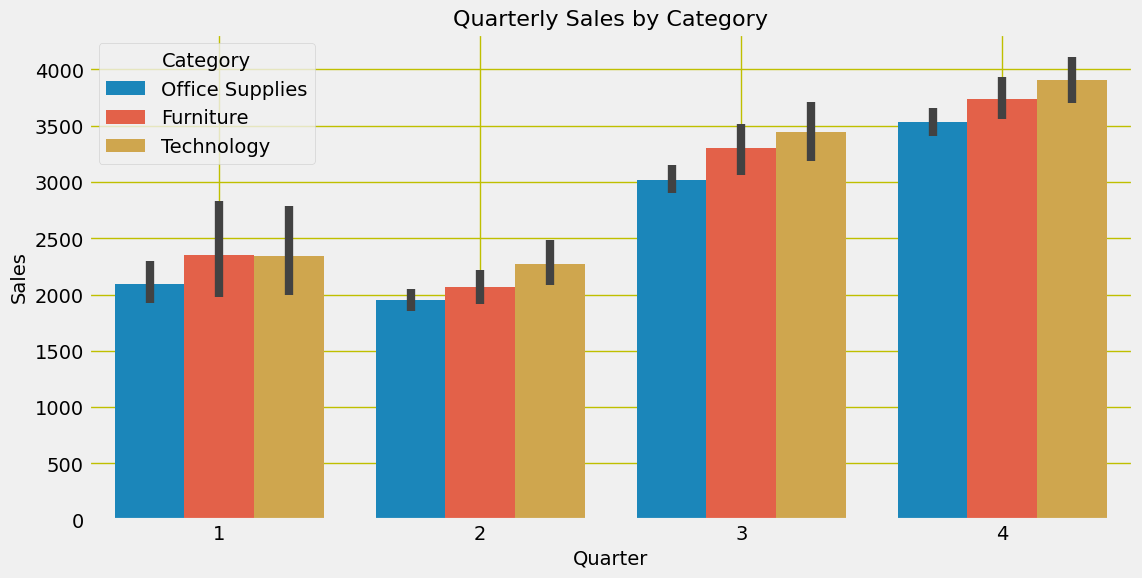

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x='Quarter',y='y',hue='Category',data=df_holiday)
plt.title('Quarterly Sales by Category',fontsize=16)
plt.xlabel('Quarter',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='y')
plt.show()

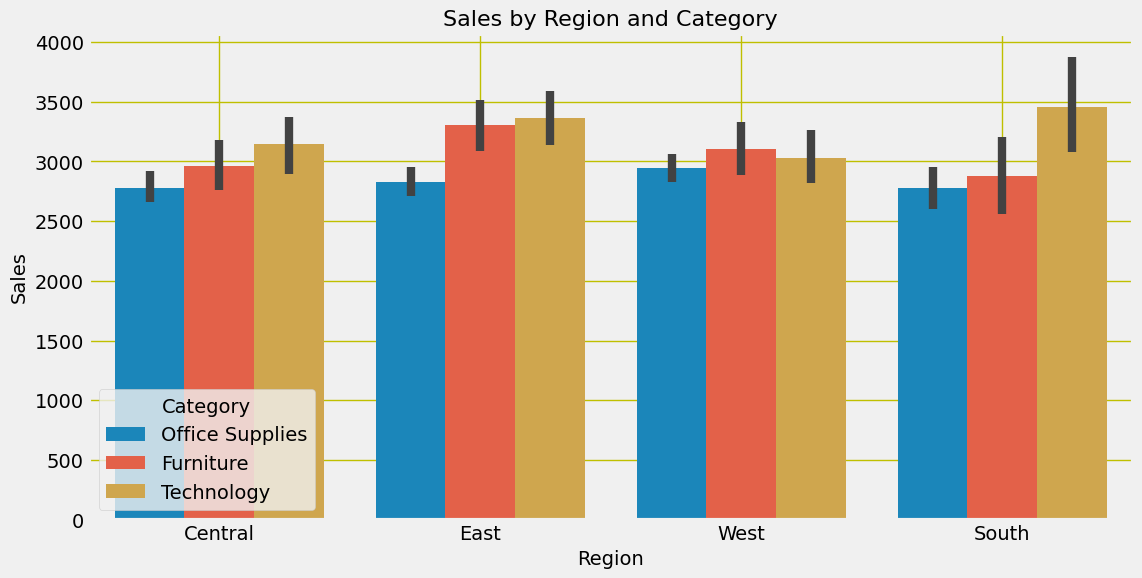

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='Region',y='y',hue='Category',data=df_holiday)
plt.title('Sales by Region and Category',fontsize=16)
plt.xlabel('Region',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='y')
plt.show()

In [32]:
import plotly.graph_objects as go
print("=== FINAL FORECASTING ===")
categories = df_holiday['Category'].unique()
regions = df_holiday['Region'].unique()
all_forecasts_list = []
for cat in categories:
    for reg in regions:
        print(f"Processing: {cat} - {reg}")
        mask = (df_holiday['Category'] == cat) & (df_holiday['Region'] == reg)
        df_subset = df_holiday[mask].copy()
        if df_subset.empty:
            continue
        daily_data = df_subset.groupby('ds').agg({
            'y': 'sum',
            'isholiday': 'max',
            'Month': 'first',
            'Quarter': 'first', 
            'Year': 'first'
        }).reset_index()
        if len(daily_data) < 30:
            print(f"  Skipping: Only {len(daily_data)} data points")
            continue
        print(f"Data points: {len(daily_data)}")
        try:
            daily_data = daily_data.sort_values('ds').reset_index(drop=True)
            daily_data['lag_1'] = daily_data['y'].shift(1)
            daily_data['lag_7'] = daily_data['y'].shift(7)
            daily_data['lag_30'] = daily_data['y'].shift(30)
            daily_data['Rolling_7'] = daily_data['y'].rolling(window=7, min_periods=1).mean()
            daily_data['Rolling_30'] = daily_data['y'].rolling(window=30, min_periods=1).mean()
            daily_data['lag_1'] = daily_data['lag_1'].fillna(method='bfill').fillna(method='ffill').fillna(0)
            daily_data['lag_7'] = daily_data['lag_7'].fillna(method='bfill').fillna(method='ffill').fillna(0)
            daily_data['lag_30'] = daily_data['lag_30'].fillna(method='bfill').fillna(method='ffill').fillna(0)
            daily_data['Rolling_7'] = daily_data['Rolling_7'].fillna(method='bfill').fillna(method='ffill').fillna(0)
            daily_data['Rolling_30'] = daily_data['Rolling_30'].fillna(method='bfill').fillna(method='ffill').fillna(0)
            print("Regressors created successfully")
            y_scaler = StandardScaler()
            lag_scaler = StandardScaler()
            rolling_scaler = StandardScaler()
            time_scaler = StandardScaler()
            daily_data['y_scaled'] = y_scaler.fit_transform(daily_data[['y']])
            lag_features = ['lag_1', 'lag_7', 'lag_30']
            daily_data[lag_features] = lag_scaler.fit_transform(daily_data[lag_features])
            rolling_features = ['Rolling_7', 'Rolling_30']
            daily_data[rolling_features] = rolling_scaler.fit_transform(daily_data[rolling_features])
            time_features = ['Month', 'Quarter', 'Year']
            daily_data[time_features] = time_scaler.fit_transform(daily_data[time_features])
            regressors = ['isholiday'] + lag_features + rolling_features + time_features
            model = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                changepoint_prior_scale=0.05,
                seasonality_prior_scale=10, 
                holidays_prior_scale=10
            )
            for regressor in regressors:
                model.add_regressor(regressor,standardize=False)
            train_data = daily_data[['ds', 'y_scaled'] + regressors].copy()
            train_data = train_data.rename(columns={'y_scaled': 'y'})
            train_data = train_data.dropna()
            if len(train_data) < 30:
                print("Skipping: Not enough data after cleaning")
                continue
            model.fit(train_data)
            future_df = model.make_future_dataframe(periods=120, include_history=False)
            future_df['Month'] = future_df['ds'].dt.month
            future_df['Quarter'] = future_df['ds'].dt.quarter
            future_df['Year'] = future_df['ds'].dt.year
            future_df['isholiday'] = future_df['ds'].isin(holidays_df['ds']).astype(int)
            predictions = []
            history = daily_data['y'].tolist()
            for i, date in enumerate(future_df['ds']):
                future_row = {
                    'ds': date,
                    'Month': date.month,
                    'Quarter': date.quarter,
                    'Year': date.year,
                    'isholiday': 1 if date in holidays_df['ds'].values else 0
                }
                if len(history) >= 1:
                    future_row['lag_1'] = history[-1]
                if len(history) >= 7:
                    future_row['lag_7'] = history[-7]
                if len(history) >= 30:
                    future_row['lag_30'] = history[-30]
                if len(history) >= 7:
                    future_row['Rolling_7'] = np.mean(history[-7:])
                if len(history) >= 30:
                    future_row['Rolling_30'] = np.mean(history[-30:])
                last_vals = daily_data[['lag_1', 'lag_7', 'lag_30', 'Rolling_7', 'Rolling_30']].iloc[-1].to_dict()
                for col in ['lag_1', 'lag_7', 'lag_30', 'Rolling_7', 'Rolling_30']:
                    if col not in future_row or pd.isna(future_row[col]):
                        future_row[col] = last_vals[col]
                future_row_scaled = future_row.copy()
                lag_values = np.array([future_row['lag_1'], future_row['lag_7'], future_row['lag_30']]).reshape(1, -1)
                lag_values_scaled = lag_scaler.transform(lag_values)
                future_row_scaled['lag_1'] = lag_values_scaled[0][0]
                future_row_scaled['lag_7'] = lag_values_scaled[0][1]
                future_row_scaled['lag_30'] = lag_values_scaled[0][2]
                rolling_values = np.array([future_row['Rolling_7'], future_row['Rolling_30']]).reshape(1, -1)
                rolling_values_scaled = rolling_scaler.transform(rolling_values)
                future_row_scaled['Rolling_7'] = rolling_values_scaled[0][0]
                future_row_scaled['Rolling_30'] = rolling_values_scaled[0][1]
                time_values = np.array([future_row['Month'], future_row['Quarter'], future_row['Year']]).reshape(1, -1)
                time_values_scaled = time_scaler.transform(time_values)
                future_row_scaled['Month'] = time_values_scaled[0][0]
                future_row_scaled['Quarter'] = time_values_scaled[0][1]
                future_row_scaled['Year'] = time_values_scaled[0][2]
                pred_df = pd.DataFrame([future_row_scaled])
                forecast = model.predict(pred_df)
                yhat_scaled = forecast['yhat'].iloc[0]
                yhat_lower_scaled = forecast['yhat_lower'].iloc[0]
                yhat_upper_scaled = forecast['yhat_upper'].iloc[0]
                yhat = y_scaler.inverse_transform([[yhat_scaled]])[0][0]
                yhat_lower = y_scaler.inverse_transform([[yhat_lower_scaled]])[0][0]
                yhat_upper = y_scaler.inverse_transform([[yhat_upper_scaled]])[0][0]
                yhat = max(0, yhat)
                yhat_lower = max(0, yhat_lower)
                yhat_upper = max(0, yhat_upper)
                predictions.append({
                    'ds': date,
                    'yhat': yhat,
                    'yhat_lower': yhat_lower,
                    'yhat_upper': yhat_upper,
                    'Category': cat,
                    'Region': reg
                })
                history.append(yhat)
            future_forecast = pd.DataFrame(predictions)
            historical_forecast = model.predict(train_data)
            historical_forecast['yhat'] = y_scaler.inverse_transform(historical_forecast[['yhat']]).flatten()
            historical_forecast['yhat_lower'] = y_scaler.inverse_transform(historical_forecast[['yhat_lower']]).flatten()
            historical_forecast['yhat_upper'] = y_scaler.inverse_transform(historical_forecast[['yhat_upper']]).flatten()
            historical_forecast['yhat'] = historical_forecast['yhat'].apply(lambda x: max(0, x))
            historical_forecast['yhat_lower'] = historical_forecast['yhat_lower'].apply(lambda x: max(0, x))
            historical_forecast['yhat_upper'] = historical_forecast['yhat_upper'].apply(lambda x: max(0, x))
            historical_forecast['Category'] = cat
            historical_forecast['Region'] = reg
            historical_forecast['y'] = daily_data.loc[train_data.index, 'y'].values
            combined = pd.concat([
                historical_forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper', 'Category', 'Region']],
                future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'Category', 'Region']]
            ], ignore_index=True)
            all_forecasts_list.append(combined)
            print(f"  ✓ Successfully forecasted with complete scaling")
        except Exception as e:
            print(f"  ✗ Error: {str(e)}")
            continue
if all_forecasts_list:
    all_forecasts = pd.concat(all_forecasts_list, ignore_index=True)
    print(f"\n=== FORECASTING COMPLETED ===")
    print(f"Total forecast records: {len(all_forecasts)}")
    print("\n=== CREATING PLOTS ===")
    for category in all_forecasts['Category'].unique():
        for region in all_forecasts['Region'].unique():
            print(f"Plotting: {category} - {region}")
            mask = (all_forecasts['Category'] == category) & (all_forecasts['Region'] == region)
            plot_data = all_forecasts[mask].sort_values('ds')
            fig = go.Figure()
            actual_data = plot_data[plot_data['y'].notna()]
            if not actual_data.empty:
                fig.add_trace(go.Scatter(
                    x=actual_data['ds'],
                    y=actual_data['y'],
                    mode='lines+markers',
                    name='Actual Sales',
                    line=dict(color='blue', width=3),
                    marker=dict(size=4)
                ))
            forecast_data = plot_data[plot_data['y'].isna()]
            if not forecast_data.empty:
                fig.add_trace(go.Scatter(
                    x=forecast_data['ds'],
                    y=forecast_data['yhat'],
                    mode='lines',
                    name='Forecast',
                    line=dict(color='red', width=2)
                ))
                fig.add_trace(go.Scatter(
                    x=forecast_data['ds'].tolist() + forecast_data['ds'].tolist()[::-1],
                    y=forecast_data['yhat_upper'].tolist() + forecast_data['yhat_lower'].tolist()[::-1],
                    fill='toself',
                    fillcolor='rgba(255, 0, 0, 0.2)',
                    line=dict(color='rgba(255,255,255,0)'),
                    name='Confidence Interval',
                    showlegend=True
                ))
            fig.update_layout(
                title=f'Sales Forecast: {category} - {region}',
                xaxis_title='Date',
                yaxis_title='Sales',
                template='plotly_white',
                height=500,
                width=900
            )
            fig.show()

=== FINAL FORECASTING ===
Processing: Office Supplies - Central
Data points: 617
Regressors created successfully


18:14:20 - cmdstanpy - INFO - Chain [1] start processing
18:14:22 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Office Supplies - East
Data points: 677
Regressors created successfully


18:14:44 - cmdstanpy - INFO - Chain [1] start processing
18:14:44 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Office Supplies - West
Data points: 705
Regressors created successfully


18:15:04 - cmdstanpy - INFO - Chain [1] start processing
18:15:05 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Office Supplies - South
Data points: 483
Regressors created successfully


18:15:21 - cmdstanpy - INFO - Chain [1] start processing
18:15:22 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Furniture - Central
Data points: 332
Regressors created successfully


18:15:39 - cmdstanpy - INFO - Chain [1] start processing
18:15:39 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Furniture - East
Data points: 380
Regressors created successfully


18:15:56 - cmdstanpy - INFO - Chain [1] start processing
18:15:56 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Furniture - West
Data points: 459
Regressors created successfully


18:16:17 - cmdstanpy - INFO - Chain [1] start processing
18:16:18 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Furniture - South
Data points: 247
Regressors created successfully


18:16:35 - cmdstanpy - INFO - Chain [1] start processing
18:16:36 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Technology - Central
Data points: 295
Regressors created successfully


18:16:54 - cmdstanpy - INFO - Chain [1] start processing
18:16:54 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Technology - East
Data points: 351
Regressors created successfully


18:17:11 - cmdstanpy - INFO - Chain [1] start processing
18:17:11 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Technology - West
Data points: 394
Regressors created successfully


18:17:28 - cmdstanpy - INFO - Chain [1] start processing
18:17:28 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling
Processing: Technology - South
Data points: 236
Regressors created successfully


18:17:46 - cmdstanpy - INFO - Chain [1] start processing
18:17:47 - cmdstanpy - INFO - Chain [1] done processing


  ✓ Successfully forecasted with complete scaling

=== FORECASTING COMPLETED ===
Total forecast records: 6616

=== CREATING PLOTS ===
Plotting: Office Supplies - Central


Plotting: Office Supplies - East


Plotting: Office Supplies - West


Plotting: Office Supplies - South


Plotting: Furniture - Central


Plotting: Furniture - East


Plotting: Furniture - West


Plotting: Furniture - South


Plotting: Technology - Central


Plotting: Technology - East


Plotting: Technology - West


Plotting: Technology - South


In [33]:
print("\n=== EXPORTING DATA FOR POWER BI ===")
powerbi_data = all_forecasts.copy()
powerbi_data['ds'] = pd.to_datetime(powerbi_data['ds'])
powerbi_data['Actual_Sales'] = powerbi_data['y']
powerbi_data['Forecast_Sales'] = powerbi_data['yhat']
powerbi_data['Forecast_Lower'] = powerbi_data['yhat_lower']
powerbi_data['Forecast_Upper'] = powerbi_data['yhat_upper']
powerbi_data['Actual_Sales'] = powerbi_data['Actual_Sales'].fillna(0)
powerbi_data['Data_Type'] = 'Historical'
powerbi_data.loc[powerbi_data['Actual_Sales'] == 0, 'Data_Type'] = 'Forecast'
powerbi_data['Year'] = powerbi_data['ds'].dt.year
powerbi_data['Month'] = powerbi_data['ds'].dt.month
powerbi_data['Month_Name'] = powerbi_data['ds'].dt.month_name()
powerbi_data['Quarter'] = powerbi_data['ds'].dt.quarter
powerbi_data['Day_of_Week'] = powerbi_data['ds'].dt.day_name()
final_columns = [
    'ds', 'Category', 'Region', 'Data_Type', 
    'Actual_Sales', 'Forecast_Sales', 'Forecast_Lower', 'Forecast_Upper',
    'Year', 'Month', 'Month_Name', 'Quarter', 'Day_of_Week'
]
powerbi_data = powerbi_data[final_columns]
powerbi_data.to_csv('powerbi_forecast_data.csv', index=False)
print("Exported: powerbi_forecast_data.csv")
print(f"Total records: {len(powerbi_data)}")
print(f"Date range: {powerbi_data['ds'].min()} to {powerbi_data['ds'].max()}")
print("\n=== CREATING SUMMARY DATA ===")
summary_data = []
for category in powerbi_data['Category'].unique():
    for region in powerbi_data['Region'].unique():
        mask = (powerbi_data['Category'] == category) & (powerbi_data['Region'] == region)
        subset = powerbi_data[mask]
        historical = subset[subset['Actual_Sales'] > 0]
        forecast = subset[subset['Data_Type'] == 'Forecast']
        if not historical.empty and not forecast.empty:
            summary_data.append({
                'Category': category,
                'Region': region,
                'Historical_Avg_Sales': historical['Actual_Sales'].mean(),
                'Historical_Total_Sales': historical['Actual_Sales'].sum(),
                'Forecast_Avg_Sales': forecast['Forecast_Sales'].mean(),
                'Forecast_Total_Sales': forecast['Forecast_Sales'].sum(),
                'Growth_Percentage': ((forecast['Forecast_Sales'].mean() - historical['Actual_Sales'].mean()) / historical['Actual_Sales'].mean()) * 100
            })
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('powerbi_summary_data.csv', index=False)
print("Exported: powerbi_summary_data.csv")

print("\n=== DATA READY FOR POWER BI ===")


=== EXPORTING DATA FOR POWER BI ===
Exported: powerbi_forecast_data.csv
Total records: 6616
Date range: 2014-01-03 00:00:00 to 2018-04-29 00:00:00

=== CREATING SUMMARY DATA ===
Exported: powerbi_summary_data.csv

=== DATA READY FOR POWER BI ===
